In [1]:
import csv
import random
import math
import matplotlib.pyplot as plt
from google.colab import files

Upload and Read the CSV file

In [2]:
uploaded = files.upload()

def read_csv(filename):
    items = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            items.append(float(row[0]))  # Use float to handle both integers and floating-point numbers
    return items

items = read_csv('items(1).csv')

Saving items(1).csv to items(1).csv


Implement Simulated Annealing

In [3]:
import random
import math

def simulated_annealing(items, bin_capacity, initial_temp, final_temp, alpha):
    def initialize_solution(items):
        random.shuffle(items)
        return first_fit(items, bin_capacity)

    def first_fit(items, bin_capacity):
        bins = []
        for item in items:
            placed = False
            for bin in bins:
                if sum(bin) + item <= bin_capacity:
                    bin.append(item)
                    placed = True
                    break
            if not placed:
                bins.append([item])
        return bins

    def neighbor(solution):
        new_solution = [bin.copy() for bin in solution]
        bin1, bin2 = random.sample(range(len(new_solution)), 2)
        if not new_solution[bin1] or not new_solution[bin2]:
            return new_solution
        item = new_solution[bin1].pop(random.randrange(len(new_solution[bin1])))
        new_solution[bin2].append(item)
        if not new_solution[bin1]:
            del new_solution[bin1]
        return new_solution

    def cost(solution):
        return len(solution)

    current_solution = initialize_solution(items)
    current_cost = cost(current_solution)
    temp = initial_temp

    while temp > final_temp:
        new_solution = neighbor(current_solution)
        new_cost = cost(new_solution)
        if new_cost < current_cost or random.uniform(0, 1) < math.exp((current_cost - new_cost) / temp):
            current_solution = new_solution
            current_cost = new_cost
        temp *= alpha

    return current_solution

# Parameters
bin_capacity = 100
initial_temp = 10000
final_temp = 1
alpha = 0.99

# Find the minimum number of bins required
bins = simulated_annealing(items, bin_capacity, initial_temp, final_temp, alpha)

# Output the total number of bins used
print(f"Total number of bins used: {len(bins)}")

# Save the bin packing result to an external file
with open('bin_packing_result.txt', 'w') as file:
    for i, bin in enumerate(bins):
        file.write(f"Bin {i+1}: {bin}\n")


Total number of bins used: 31


In [4]:
# Check the content of the output file
with open('bin_packing_result.txt', 'r') as file:
    content = file.read()
    print(content)


Bin 1: [26.4, 25.2, 25.4, 44.1, 35.5, 41.9]
Bin 2: [25.5, 25.5, 36.6, 36.3, 25.3, 27.4, 26.8, 33.3, 33.7, 37.2, 40.0]
Bin 3: [35.6, 40.7, 26.1, 46.9, 25.8, 37.6]
Bin 4: [35.0, 48.8, 39.2, 25.3, 30.8, 39.2, 25.7, 29.3, 29.7, 47.8]
Bin 5: [27.6, 35.2, 36.6, 49.5, 42.6, 31.0, 49.5, 48.0, 25.5, 26.4, 25.4, 25.0, 26.0]
Bin 6: [26.0, 29.2, 27.3]
Bin 7: [25.3, 25.0, 30.1, 47.3, 25.0, 26.1, 27.1, 31.2, 40.4, 25.2, 27.4, 49.1]
Bin 8: [25.0, 28.1, 47.2, 28.2, 25.1, 25.8, 29.1, 35.9, 25.1, 31.5, 27.2, 27.4]
Bin 9: [25.2, 46.4, 35.0, 38.2, 43.9, 34.6, 26.3, 35.7, 26.2, 29.4]
Bin 10: [41.4, 48.0, 35.7, 28.7, 36.1, 44.1, 28.0, 44.6, 46.6]
Bin 11: [27.1, 49.7, 29.5, 30.7, 30.2, 48.5, 26.9, 29.8, 27.4, 31.4, 30.5, 25.0, 47.4, 25.1]
Bin 12: [49.7, 41.5, 25.9, 26.6, 25.1, 25.9]
Bin 13: [45.0, 36.7, 27.2, 27.8, 49.6]
Bin 14: [44.5, 25.8]
Bin 15: [26.9, 38.6, 28.1, 25.9, 25.5, 26.0, 41.0, 25.3, 29.4, 25.6, 25.2, 36.6]
Bin 16: [48.5, 42.6, 40.6, 33.6, 42.2, 43.0, 46.2, 26.9, 34.2, 27.5, 28.7, 36.6]
Bin 17:

Visualize the Performance

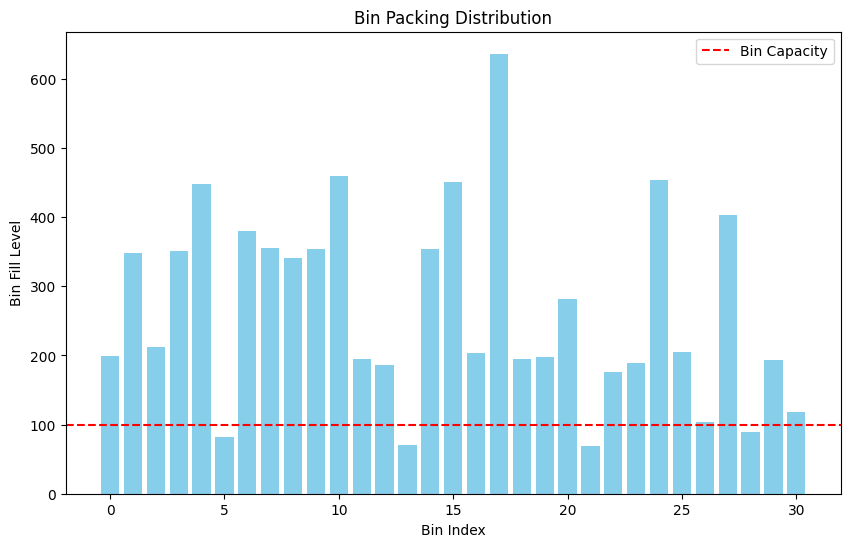

In [5]:
import matplotlib.pyplot as plt

def plot_bins(bins, bin_capacity):
    bin_indices = range(len(bins))
    bin_sums = [sum(bin) for bin in bins]
    plt.figure(figsize=(10, 6))
    plt.bar(bin_indices, bin_sums, color='skyblue')
    plt.axhline(y=bin_capacity, color='r', linestyle='--', label='Bin Capacity')
    plt.xlabel('Bin Index')
    plt.ylabel('Bin Fill Level')
    plt.title('Bin Packing Distribution')
    plt.legend()
    plt.show()

# Visualize the bin distribution
plot_bins(bins, bin_capacity)



In [6]:
from google.colab import files
files.download('bin_packing_result.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>